In [1]:
import tensorflow as tf        
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from utils import *

2023-02-24 15:00:06.027700: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-24 15:00:07.010730: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.8/include:/usr/local/cuda-11.8/lib64:
2023-02-24 15:00:07.010826: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.8/include:/usr/local/cuda-11.8/lib64:
2023-02-24 15:00

In [2]:
configureGPU()

1 Physical GPUs, 1 Logical GPUs


2023-02-24 15:00:08.202994: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-24 15:00:08.903886: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1608 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 750 Ti, pci bus id: 0000:02:00.0, compute capability: 5.0


In [3]:
model = tf.keras.models.load_model('./models/model.h5')

In [4]:
BATCH_SIZE = 4
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
SEED = 123
N_CLASSES = 66

DATA_PATH = "./data_test/"
test_x = getDataset(DATA_PATH + "images/", BATCH_SIZE, IMAGE_HEIGHT, IMAGE_WIDTH, SEED)
test_y = getDataset(DATA_PATH + "instances/", BATCH_SIZE, IMAGE_HEIGHT, IMAGE_WIDTH, SEED)
test_ds = tf.data.Dataset.zip((test_x, test_y))

Found 18000 files belonging to 1 classes.
Found 18000 files belonging to 1 classes.


In [5]:
def normalize(input_image, input_mask):
    input_image = tf.cast(input_image, tf.float32) / 255.0 # [0.0, 1.0]
    input_mask = tf.cast(input_mask[:, :, :, 0], np.uint8) # [0, 65]
    input_mask = tf.one_hot(input_mask, N_CLASSES) # One hot each pixel
    return input_image, input_mask

In [6]:
test_ds = test_ds.map(normalize)

In [7]:
def displayConfusionMatrix(model, test_ds, n):
    sampled_ds = test_ds.take(n)
    
    y_pred = model.predict(sampled_ds)
    y_pred = tf.math.argmax(y_pred, axis=-1)
    y_pred = y_pred.numpy().flatten()
    
    y_true = np.concatenate([y for x, y in sampled_ds], axis=0)
    y_true = tf.math.argmax(y_true, axis=-1)
    y_true = y_true.numpy().flatten()
    
    confusion = tf.math.confusion_matrix(labels = y_true, predictions = y_pred, num_classes = N_CLASSES)
    confusion = confusion.numpy()
    
    confusion_df = pd.DataFrame(confusion)
    
    plt.imshow(confusion, cmap = 'hot', interpolation = 'nearest')
    plt.colorbar()
    plt.show()
    
    print("Precision (0) = ", confusion[0,0] / sum(confusion[:,0]))
    print("Recall (0) = ", confusion[0,0] / sum(confusion[0,:]))
    return confusion_df

2023-02-24 15:00:17.309678: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8700
2023-02-24 15:00:18.862430: W tensorflow/tsl/framework/bfc_allocator.cc:360] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact. Set TF_ENABLE_GPU_GARBAGE_COLLECTION=false if you'd like to disable this feature.
2023-02-24 15:00:19.145764: W tensorflow/tsl/framework/bfc_allocator.cc:360] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-

12/12 [==============================] - 9s 145ms/step


2023-02-24 15:00:21.496080: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 635830272 exceeds 10% of free system memory.
2023-02-24 15:00:22.141207: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 635830272 exceeds 10% of free system memory.
2023-02-24 15:00:29.762704: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 635830272 exceeds 10% of free system memory.


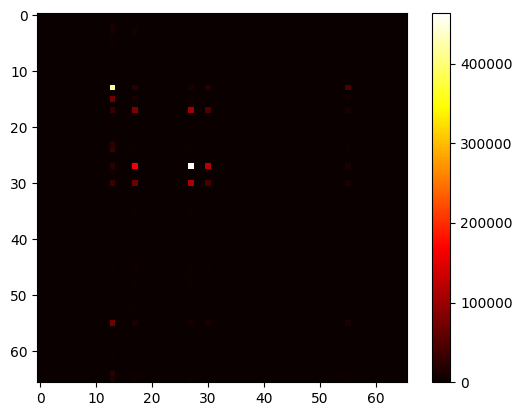

Precision (0) =  nan
Recall (0) =  0.0


/tmp/ipykernel_22217/2886116880.py:21: RuntimeWarning: invalid value encountered in scalar divide
  print("Precision (0) = ", confusion[0,0] / sum(confusion[:,0]))


In [8]:
confusion_df = displayConfusionMatrix(model, test_ds, 12)

In [9]:
display(confusion_df)

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,128
3,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,13,547
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,34,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,18,153
62,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,55
63,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
64,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,160,78


In [9]:
results = model.evaluate(test_ds, batch_size = BATCH_SIZE)

2023-02-24 13:59:22.770930: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8700
2023-02-24 13:59:24.000804: W tensorflow/tsl/framework/bfc_allocator.cc:360] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact. Set TF_ENABLE_GPU_GARBAGE_COLLECTION=false if you'd like to disable this feature.
2023-02-24 13:59:24.319911: W tensorflow/tsl/framework/bfc_allocator.cc:360] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-

4500/4500 [==============================] - 1505s 332ms/step - loss: 1.1733 - categorical_accuracy: 0.7433 - precision: 0.1716


In [13]:
titles = ['Loss', 'Accuracy', 'Precision']

for i in range(len(titles)):
    print(f"{titles[i]} - {round(results[i], 2)}")

Loss - 1.17
Accuracy - 0.74
Precision - 0.17
